In [2]:
%pylab inline
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


In [7]:
pos = pygadgetreader.readsnap('../data/MW2_1M_halo_bd_beta1_vir_000', 'pos', 'disk')
mass = pygadgetreader.readsnap('../data/MW2_1M_halo_bd_beta1_vir_000', 'mass', 'disk')

Returning DISK  Positions
Returning DISK  Mass


In [107]:
np.sum(mass)

6.508797

(-10.0, 10.0)

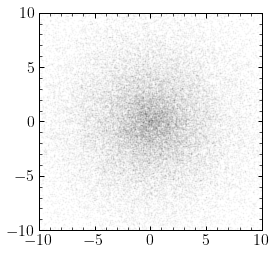

In [60]:
figsize(4,4)
scatter(pos[:,0], pos[:,1], s=1, alpha=0.02, c='k')
#scatter(0, 0, c='r')
xlim(-10, 10)
ylim(-10, 10)

(-30.0, 30.0)

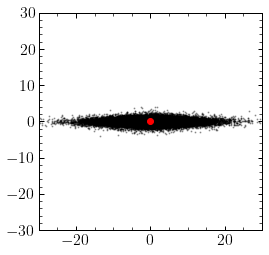

In [56]:
scatter(pos[:,0], pos[:,2], s=1, alpha=0.3, c='k')
scatter(0, 0, c='r')
xlim(-30, 30)
ylim(-30, 30)

In [109]:
def enclosed_mass(pos, mass):
    rdisk = np.sqrt(np.sum(pos**2, axis=1))
    print(np.min(rdisk), np.max(rdisk))
    rbins = np.arange(0, 60, 0.5)
    m_encl = np.zeros(120)
    rho = np.zeros(120)
    for i in range(len(rbins)-1):
        mbin =  np.where((rdisk<rbins[i+1]) & (rdisk>=rbins[i]))[0]
        #print(mbin)
        m_encl[i] = np.sum(mass[mbin])
        rho[i] = 3/(4*np.pi) * m_encl[i]/(rbins[i+1]**3 - rbins[i]**3)
        #print(m_encl[i])
    return rbins+0.5, m_encl, rho

In [110]:
rdisk, mprof_disk, rho_disk = enclosed_mass(pos, mass)

0.07109366 52.646114


In [111]:
mprof_disk

array([2.22600829e-02, 1.16377287e-01, 2.19736993e-01, 2.76363492e-01,
       3.21925044e-01, 3.19191396e-01, 3.36895287e-01, 3.40149701e-01,
       3.35202992e-01, 3.27782989e-01, 3.13854158e-01, 3.05392742e-01,
       2.89250910e-01, 2.55795717e-01, 2.36659855e-01, 2.26896659e-01,
       2.08411664e-01, 1.94092318e-01, 1.84459299e-01, 1.64282024e-01,
       1.42282277e-01, 1.36164010e-01, 1.23536967e-01, 1.12732366e-01,
       1.02708809e-01, 9.02119130e-02, 7.83659071e-02, 7.70641491e-02,
       7.04251677e-02, 6.17033951e-02, 5.88395223e-02, 4.51710448e-02,
       4.28278819e-02, 4.17864695e-02, 3.76208425e-02, 3.08516994e-02,
       2.72067711e-02, 2.86387056e-02, 2.22600829e-02, 2.33014897e-02,
       1.83548033e-02, 1.69228688e-02, 1.41891753e-02, 1.17158331e-02,
       1.23667112e-02, 1.05442498e-02, 9.11231246e-03, 8.85196123e-03,
       7.42002716e-03, 5.46738878e-03, 6.11826917e-03, 5.33721270e-03,
       4.16562939e-03, 4.68633370e-03, 2.08281470e-03, 2.47334223e-03,
      

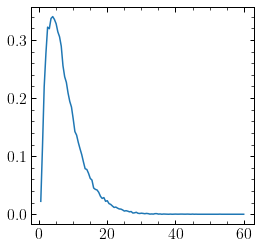

In [112]:
plot(rdisk, mprof_disk)

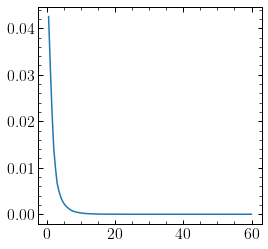

In [113]:
plot(rdisk, rho_disk)

In [114]:
np.savetxt?

In [121]:
np.savetxt('mw_disk_profiles.txt', np.array([rdisk, mprof_disk, rho_disk]).T, header='r [kpc], mass in bin [Msun/1E10], density in bin')

In [122]:
!head mw_disk_profiles.txt

# r [kpc], mass in bin [Msun/1E10], density in bin
5.000000000000000000e-01 2.226008288562297821e-02 4.251362669858638199e-02
1.000000000000000000e+00 1.163772866129875183e-01 3.175203501956437580e-02
1.500000000000000000e+00 2.197369933128356934e-01 2.208772336792961047e-02
2.000000000000000000e+00 2.763634920120239258e-01 1.426528081422199189e-02
2.500000000000000000e+00 3.219250440597534180e-01 1.007920565256117257e-02
3.000000000000000000e+00 3.191913962364196777e-01 6.699018264188570486e-03
3.500000000000000000e+00 3.368952870368957520e-01 5.066319707365500927e-03
4.000000000000000000e+00 3.401497006416320801e-01 3.844012277988936507e-03
4.500000000000000000e+00 3.352029919624328613e-01 2.950186900092942929e-03
